<a href="https://colab.research.google.com/github/ducnguyen1704/TienXuLyDuLieu/blob/master/TH%E1%BB%B0C_H%C3%80NH_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Thực hành] Chuẩn hoá dữ liệu với Robust Scaling

In [1]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# 1. Khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,55.096530,6.501081,7.911214,19.299047,21.777978
1,24.321951,11.060232,10.619541,16.952112,16.399817
2,51.082983,1.444861,9.995939,-2.614795,14.973652
3,59.614057,9.831047,10.826022,2.960218,20.324042
4,56.351493,36.612011,10.269401,1.723896,19.400893


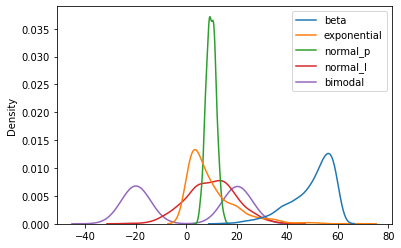

In [3]:
# Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [4]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.885510,9.885155,9.883885,9.985132,0.232021
std,8.609111,9.645224,1.929346,9.811773,20.341189
min,15.393848,0.020793,4.635912,-23.928520,-29.877752
25%,45.104611,3.072710,8.523083,3.578811,-19.820132
50%,52.559372,6.793542,9.879960,10.358689,0.378191
75%,56.675449,13.780956,11.230966,16.641070,20.150185
max,59.997564,67.962240,15.525607,39.708670,28.222356


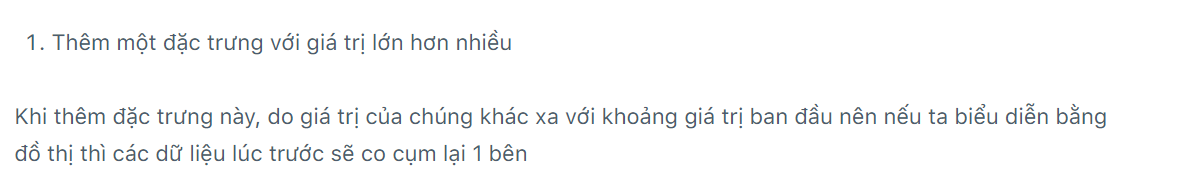

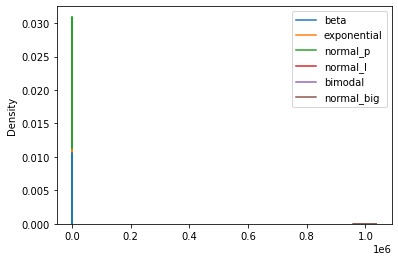

In [5]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

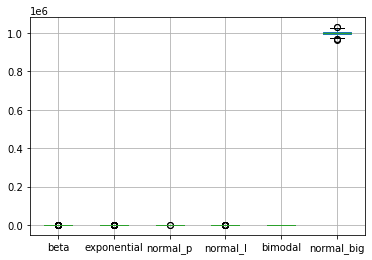

In [6]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [7]:
# Chuẩn hóa với Robust Scaling
# Khai báo đối tượng RobustScaler
scaler = RobustScaler()

In [8]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [9]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.219272,-0.027312,-0.727043,0.684442,0.535392,-0.790723
1,-2.440395,0.398449,0.273121,0.504769,0.400838,0.725104
2,-0.127596,-0.499492,0.042830,-0.993204,0.365157,-0.781248
3,0.609695,0.283660,0.349373,-0.566401,0.499017,-0.200897
4,0.327731,2.784627,0.143817,-0.661049,0.475921,-1.095914


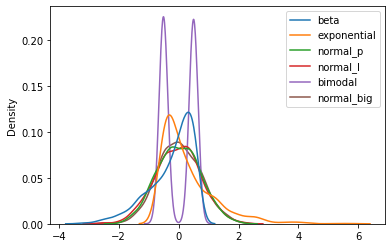

In [10]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [11]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-2.310862e-01,0.288713,1.449499e-03,-0.028598,-0.003657,0.017613
std,7.440352e-01,0.900729,7.124924e-01,0.751154,0.508907,0.707827
min,-3.211999e+00,-0.632480,-1.936586e+00,-2.624906,-0.756960,-2.440241
25%,-6.442715e-01,-0.347474,-5.010842e-01,-0.519043,-0.505333,-0.474787
50%,3.070461e-16,0.000000,3.278627e-16,0.000000,0.000000,0.000000
75%,3.557285e-01,0.652526,4.989158e-01,0.480957,0.494667,0.525213
max,6.428395e-01,5.712298,2.084893e+00,2.246930,0.696621,2.153261


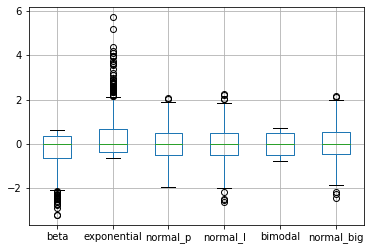

In [12]:
df_s.boxplot()

In [13]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.211999321136189,
 -0.6324798194313844,
 -1.9365859780440093,
 -2.624906341690049,
 -0.7569603195633219,
 -2.440241049474922]

In [14]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.6428395375974136,
 5.712298487899714,
 2.084892956870555,
 2.2469298632619163,
 0.6966210733128302,
 2.1532611764018528]

In [15]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.25593719e+01, 6.79354205e+00, 9.87996038e+00, 1.03586889e+01,
       3.78191297e-01, 9.99692708e+05])